In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.style.use('ggplot')
sns.set_theme()


In [27]:

df = pd.read_csv('./data/benin-malanville.csv')


df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [28]:

df.info()


df.describe()


missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514854 entries, 0 to 514853
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      514854 non-null  object 
 1   GHI            514854 non-null  float64
 2   DNI            514854 non-null  float64
 3   DHI            514854 non-null  float64
 4   ModA           514854 non-null  float64
 5   ModB           514854 non-null  float64
 6   Tamb           514854 non-null  float64
 7   RH             514854 non-null  float64
 8   WS             514854 non-null  float64
 9   WSgust         514854 non-null  float64
 10  WSstdev        514854 non-null  float64
 11  WD             514854 non-null  float64
 12  WDstdev        514854 non-null  float64
 13  BP             514854 non-null  int64  
 14  Cleaning       514854 non-null  int64  
 15  Precipitation  514854 non-null  float64
 16  TModA          514854 non-null  float64
 17  TModB          514854 non-nul

Comments    514854
dtype: int64

In [29]:

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


z_scores = np.abs(stats.zscore(df[cols].dropna()))
outliers = (z_scores > 3).sum()

outliers



np.int64(1889)

In [30]:

df_clean = df.copy()
for col in cols:
    df_clean[col] = df_clean[col].fillna(df[col].median())


df_clean = df_clean[(np.abs(stats.zscore(df_clean[cols])) < 3).all(axis=1)]


df_clean.to_csv('./data/benin-malanville.csv', index=False)


c:\Users\blien\OneDrive\Desktop\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


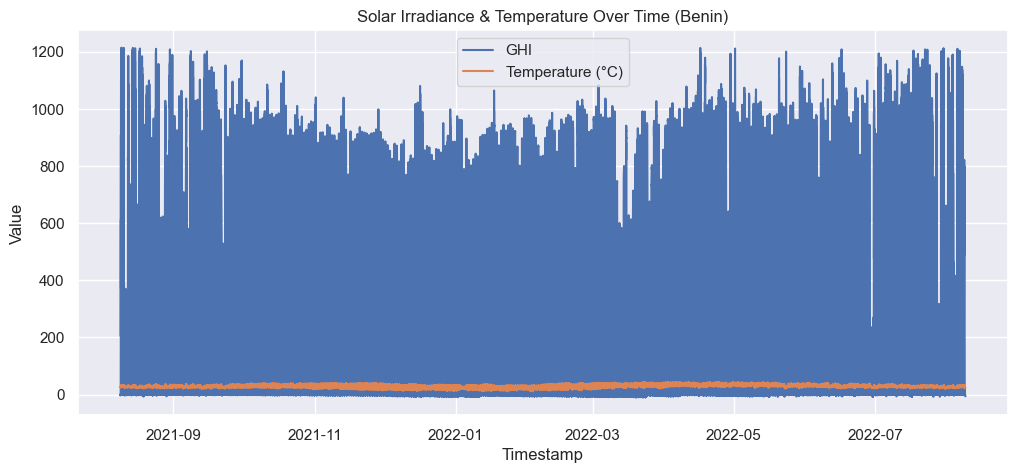

In [31]:

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(12,5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['Tamb'], label='Temperature (°C)')
plt.legend()
plt.title('Solar Irradiance & Temperature Over Time (Benin)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()


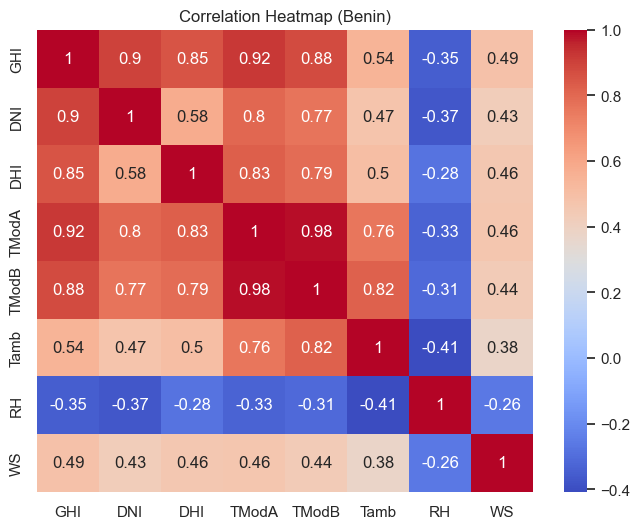

In [32]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Benin)')
plt.show()


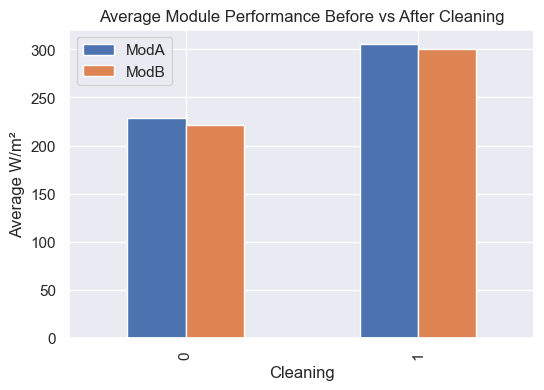

In [33]:

if 'Cleaning' in df_clean.columns:
    cleaning_summary = df_clean.groupby('Cleaning')[['ModA','ModB']].mean()
    cleaning_summary.plot(kind='bar', figsize=(6,4))
    plt.title('Average Module Performance Before vs After Cleaning')
    plt.ylabel('Average W/m²')
    plt.show()


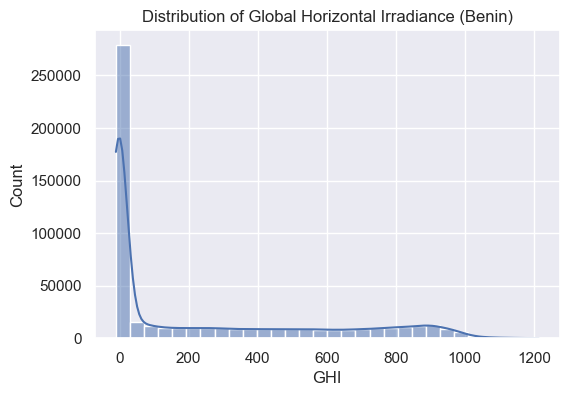

In [34]:

plt.figure(figsize=(6,4))
sns.histplot(df_clean['GHI'], bins=30, kde=True)
plt.title('Distribution of Global Horizontal Irradiance (Benin)')
plt.show()


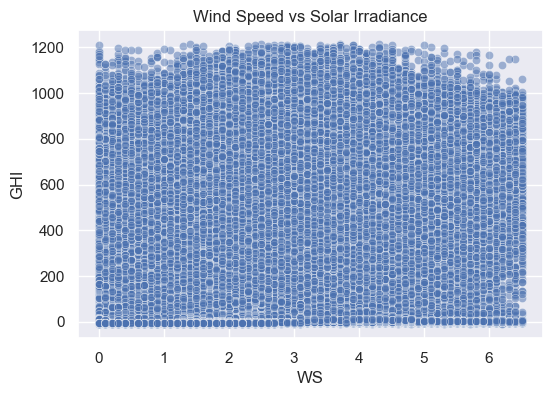

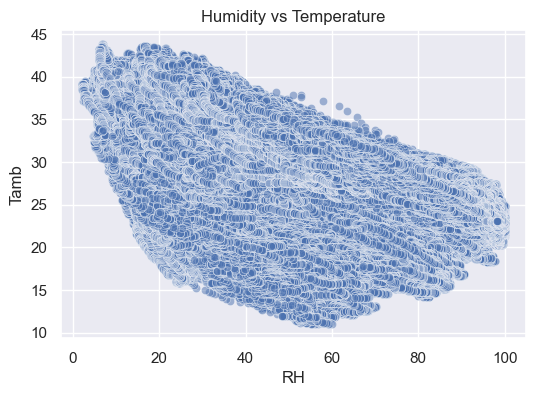

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='WS', y='GHI', data=df_clean, alpha=0.5)
plt.title('Wind Speed vs Solar Irradiance')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.5)
plt.title('Humidity vs Temperature')
plt.show()


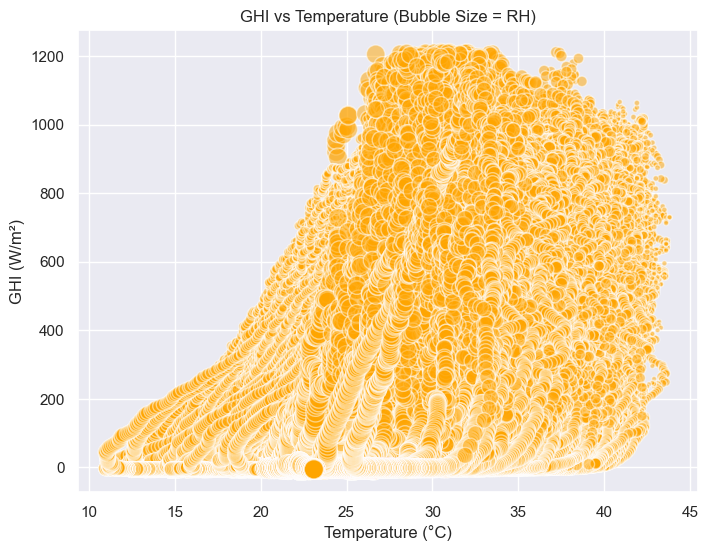

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'],
            s=df_clean['RH']*2, alpha=0.5, c='orange', edgecolors='w')
plt.title('GHI vs Temperature (Bubble Size = RH)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()
